# WeatherPy
----

### Analysis
The temperature becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The Norhtern Hemisphere is significantly colder (currently winter time) than the souther hemisphere (currently summer time).

There is no correlation between %humidity and latitude. 100% humidity menas rain, and cities at all latitudes experiene rain.

There is no correlation between %cloudiness and latitude.

Wind Speed is pretty consistently under 20mph around the world (all latitudes). However, there are a couple of cities closer to the poles that have higher wind speeds.

In [1]:
# Dependencies and Setup
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['mataura',
 'sur',
 'lumberton',
 'tsihombe',
 'cape town',
 'bengkulu',
 'dingle',
 'bluff',
 'jedovnice',
 'kapaa',
 'isangel',
 'kamenka',
 'kodiak',
 'sobolevo',
 'henties bay',
 'hermanus',
 'vitim',
 'codrington',
 'atuona',
 'chokurdakh',
 'namibe',
 'lasa',
 'labuhan',
 'clyde river',
 'shelburne',
 'arraial do cabo',
 'vaini',
 'jamestown',
 'omagari',
 'taoudenni',
 'tuktoyaktuk',
 'ambilobe',
 'hambantota',
 'svetlogorsk',
 'kununurra',
 'dukat',
 'xinmin',
 'ushuaia',
 'rikitea',
 'saint-philippe',
 'vaitupu',
 'yongan',
 'kleinblittersdorf',
 'buritis',
 'taolanaro',
 'methven',
 'masvingo',
 'carahue',
 'kaitangata',
 'mys shmidta',
 'olinda',
 'bullhead city',
 'samusu',
 'wakema',
 'nikolskoye',
 'busselton',
 'belushya guba',
 'faanui',
 'salinopolis',
 'san patricio',
 'vao',
 'mecca',
 'galesong',
 'cabo san lucas',
 'yartsevo',
 'chabahar',
 'sorong',
 'qaanaaq',
 'albany',
 'jagannathpur',
 'katsuura',
 'cumaribo',
 'bulolo',
 'bredasdorp',
 'alice springs',
 'sre

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key='&APPID=0fe4d15bd94d4fb706c2f5a1779c19a4'
url='http://api.openweathermap.org/data/2.5/weather?q='
units='&units=imperial'
counter=0

pre_df = []

for city in cities:
    
    combined_url=url+city+api_key+units
    
    try:
        response=requests.get(combined_url).json()
        counter+=1
        print ("Processing record {0}| {1}".format(counter, response['name']))
        
        city_name=response['name']
        cloudiness=response['clouds']['all']
        country=response['sys']['country']
        date=response['dt']
        humidity=response['main']['humidity']
        lat=response['coord']['lat']
        lon=response['coord']['lon']
        max_temp=response['main']['temp_max']
        wind_speed=response['wind']['speed']
        
        city_data={'City': city_name,
         'Country': country,
         'Cloudiness': cloudiness,
         'Date': date,
         'Humidity': humidity,
         'Lat': lat,
         'Lon': lon,
         'Max Temperature': max_temp,
         'Wind Speed': wind_speed}
        
        pre_df.append(city_data)
        
    except :
        print ("City not found. Skipping {0}.....".format(city))
        counter-=1

df = pd.DataFrame(pre_df)

Processing record 1| Mataura
Processing record 2| Sur
Processing record 3| Lumberton
City not found. Skipping tsihombe.....
Processing record 4| Cape Town
City not found. Skipping bengkulu.....
Processing record 5| Dingle
Processing record 6| Bluff
Processing record 7| Jedovnice
Processing record 8| Kapaa
Processing record 9| Isangel
Processing record 10| Kamenka
Processing record 11| Kodiak
Processing record 12| Sobolevo
Processing record 13| Henties Bay
Processing record 14| Hermanus
Processing record 15| Vitim
Processing record 16| Codrington
Processing record 17| Atuona
Processing record 18| Chokurdakh
Processing record 19| Namibe
Processing record 20| Lasa
Processing record 21| Labuhan
Processing record 22| Clyde River
Processing record 23| Shelburne
Processing record 24| Arraial do Cabo
Processing record 25| Vaini
Processing record 26| Jamestown
Processing record 27| Omagari
Processing record 28| Taoudenni
Processing record 29| Tuktoyaktuk
Processing record 30| Ambilobe
Processin

Processing record 230| Khatanga
Processing record 231| Kapit
Processing record 232| Victoria
City not found. Skipping asau.....
City not found. Skipping sumbawa.....
Processing record 233| Newport
Processing record 234| Semey
Processing record 235| Kieta
Processing record 236| Cayenne
Processing record 237| Nishihara
Processing record 238| Myaundzha
Processing record 239| Bethel
Processing record 240| Awbari
City not found. Skipping tumannyy.....
Processing record 241| Yar-Sale
Processing record 242| Santa Cruz
Processing record 243| Conakry
Processing record 244| Skibbereen
Processing record 245| Kendari
Processing record 246| Taksimo
Processing record 247| Carman
Processing record 248| Pangnirtung
City not found. Skipping sorvag.....
Processing record 249| Husavik
City not found. Skipping cockburn harbour.....
Processing record 250| Mount Isa
Processing record 251| Ostrovnoy
Processing record 252| Bandarbeyla
Processing record 253| Westport
Processing record 254| Shimoda
Processing r

Processing record 461| Aykhal
Processing record 462| Turukhansk
Processing record 463| Ocos
Processing record 464| Griffith
Processing record 465| Coari
Processing record 466| Yuksekova
Processing record 467| Nuuk
Processing record 468| Jiazi
Processing record 469| Lithakia
Processing record 470| Arona
Processing record 471| Kibaya
Processing record 472| Norman Wells
City not found. Skipping nizhneyansk.....
Processing record 473| Yenagoa
Processing record 474| Tingo Maria
Processing record 475| Tomatlan
Processing record 476| Rabaul
Processing record 477| Hvide Sande
Processing record 478| Parsabad
Processing record 479| Monki
Processing record 480| Lucea
City not found. Skipping mutsamudu.....
Processing record 481| Filadelfia
Processing record 482| Kincardine
Processing record 483| Kaoma
Processing record 484| Agadez
Processing record 485| San Jose
Processing record 486| Mae Hong Son
Processing record 487| Balangir
Processing record 488| Raudeberg
City not found. Skipping severnyy..

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
df.to_csv('output_data/cities.csv', index=False)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temperature,Wind Speed
0,Mataura,24,NZ,1543794385,69,-46.19,168.86,76.53,4.72
1,Sur,8,OM,1543794385,100,22.57,59.53,72.97,1.70
2,Lumberton,1,US,1543792500,42,30.27,-94.20,73.94,4.70
3,Cape Town,75,ZA,1543791600,77,-33.93,18.42,64.40,12.75
4,Dingle,24,PH,1543794385,85,11.00,122.67,79.09,10.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

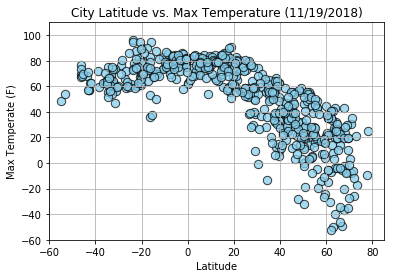

In [10]:
LT_xaxis=df['Lat']
LT_yaxis=df['Max Temperature']

plt.scatter(LT_xaxis, LT_yaxis, alpha=0.75, color='skyblue', edgecolors='black', s=70)
plt.title("City Latitude vs. Max Temperature (11/19/2018)")
plt.grid(True)
plt.ylabel("Max Temperate (F)")
plt.xlabel("Latitude")
plt.xlim(-60,85)
plt.ylim(-60, 110)
plt.savefig("output_data/latitudevstemperatureplot.png")
plt.show()

#### Latitude vs. Humidity Plot

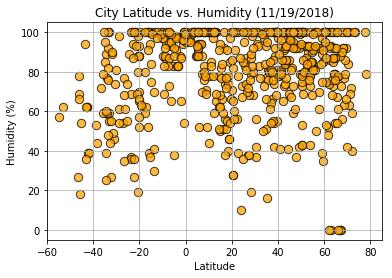

In [19]:
LH_xaxis=df['Lat']
LH_yaxis=df['Humidity']

plt.scatter(LH_xaxis, LH_yaxis, alpha=0.75, color='orange', edgecolors='black', s=70)
plt.title("City Latitude vs. Humidity (11/19/2018)")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-60,85)
plt.ylim(-5, 105)
plt.savefig("output_data/latitudevshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

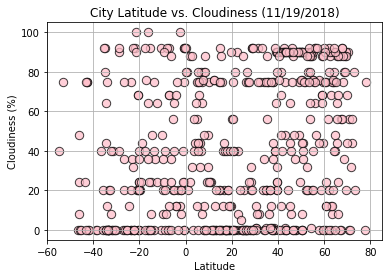

In [20]:
LC_xaxis=df['Lat']
LC_yaxis=df['Cloudiness']

plt.scatter(LC_xaxis, LC_yaxis, alpha=0.75, color='pink', edgecolors='black', s=70)
plt.title("City Latitude vs. Cloudiness (11/19/2018)")
plt.grid(True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-60,85)
plt.ylim(-5, 105)
plt.savefig("output_data/latitudevscloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

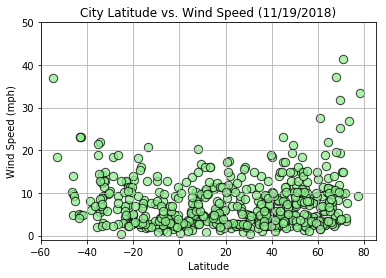

In [21]:
LW_xaxis=df['Lat']
LW_yaxis=df['Wind Speed']

plt.scatter(LW_xaxis, LW_yaxis, alpha=0.75, color='lightgreen', edgecolors='black', s=70)
plt.title("City Latitude vs. Wind Speed (11/19/2018)")
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-60,85)
plt.ylim(-1, 50)
plt.savefig("output_data/latitudevswindspeed.png")
plt.show()